In [10]:
# logging 
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


In [11]:
# environment setup
import gym
# noinspection PyUnresolvedReferences
import gym_maze


maze = gym.make('Maze4-v0')
maze.render()


A A A A A A A A
A A A A A A A A
A A A A A A A A
A A A A A A A A
A A A A A A A A
A A A A A A A A
A A A A A A A A
A A A A A A A A


In [12]:
from lcs.agents.xcs import XCS, Configuration, Classifier
from lcs import Perception


def predicts_successfully(cl: Classifier, perception: Perception, action):
    if cl.does_match(perception):
        if cl.action == action:
            return True
    return False


def xcs_maze_knowledge(population, environment) -> float:
    transitions = environment.env.get_all_possible_transitions()
    nr_correct = 0

    for start, action, end in transitions:
        perception = environment.env.maze.perception(*start)
        if any([True for cl in population
                if predicts_successfully(cl, perception, action)]):
            nr_correct += 1
    return nr_correct / len(transitions)


def xcs_maze_metrics(xcs: XCS, environment):
    return {
        'population': xcs.population.numerosity(),
        'knowledge': xcs_maze_knowledge(xcs.population, environment)
    }


cfg = Configuration(theta_mna=2,
                    user_metrics_collector_fcn=xcs_maze_metrics)

agent = XCS(cfg)
population, explore_metrics = agent.explore(maze, 500)
agent = XCS(cfg, population)
population, exploit_metrics = agent.exploit(maze, 100)


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 50, 'reward': 0, 'population': 53, 'knowledge': 0.0}


INFO:lcs.agents.Agent:{'trial': 50, 'steps_in_trial': 2, 'reward': 1000, 'population': 191, 'knowledge': 0.12173913043478261}


INFO:lcs.agents.Agent:{'trial': 100, 'steps_in_trial': 50, 'reward': 0, 'population': 159, 'knowledge': 0.10434782608695652}


INFO:lcs.agents.Agent:{'trial': 150, 'steps_in_trial': 5, 'reward': 1000, 'population': 152, 'knowledge': 0.09565217391304348}


INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 50, 'reward': 0, 'population': 155, 'knowledge': 0.11304347826086956}


INFO:lcs.agents.Agent:{'trial': 250, 'steps_in_trial': 50, 'reward': 0, 'population': 194, 'knowledge': 0.11304347826086956}


INFO:lcs.agents.Agent:{'trial': 300, 'steps_in_trial': 50, 'reward': 0, 'population': 181, 'knowledge': 0.11304347826086956}


INFO:lcs.agents.Agent:{'trial': 350, 'steps_in_trial': 2, 'reward': 1000, 'population': 184, 'knowledge': 0.11304347826086956}


INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 50, 'reward': 0, 'population': 198, 'knowledge': 0.08695652173913043}


INFO:lcs.agents.Agent:{'trial': 450, 'steps_in_trial': 5, 'reward': 1000, 'population': 182, 'knowledge': 0.11304347826086956}


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 50, 'reward': 0, 'population': 173, 'knowledge': 0.10434782608695652}


INFO:lcs.agents.Agent:{'trial': 10, 'steps_in_trial': 50, 'reward': 0, 'population': 195, 'knowledge': 0.10434782608695652}


INFO:lcs.agents.Agent:{'trial': 20, 'steps_in_trial': 50, 'reward': 0, 'population': 163, 'knowledge': 0.10434782608695652}


INFO:lcs.agents.Agent:{'trial': 30, 'steps_in_trial': 1, 'reward': 1000, 'population': 172, 'knowledge': 0.11304347826086956}


INFO:lcs.agents.Agent:{'trial': 40, 'steps_in_trial': 50, 'reward': 0, 'population': 177, 'knowledge': 0.10434782608695652}


INFO:lcs.agents.Agent:{'trial': 50, 'steps_in_trial': 50, 'reward': 0, 'population': 162, 'knowledge': 0.11304347826086956}


INFO:lcs.agents.Agent:{'trial': 60, 'steps_in_trial': 5, 'reward': 1000, 'population': 178, 'knowledge': 0.12173913043478261}


INFO:lcs.agents.Agent:{'trial': 70, 'steps_in_trial': 50, 'reward': 0, 'population': 187, 'knowledge': 0.12173913043478261}


INFO:lcs.agents.Agent:{'trial': 80, 'steps_in_trial': 50, 'reward': 0, 'population': 176, 'knowledge': 0.11304347826086956}


INFO:lcs.agents.Agent:{'trial': 90, 'steps_in_trial': 50, 'reward': 0, 'population': 148, 'knowledge': 0.10434782608695652}


Text(0, 0.5, 'steps for solution')

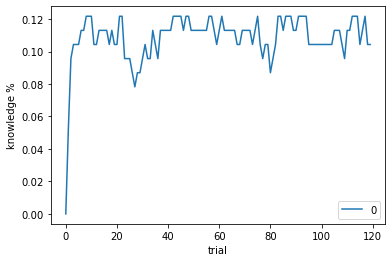

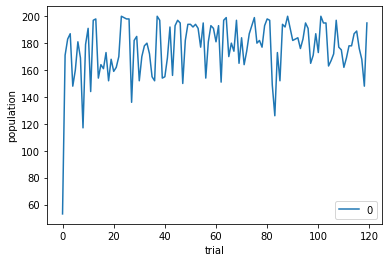

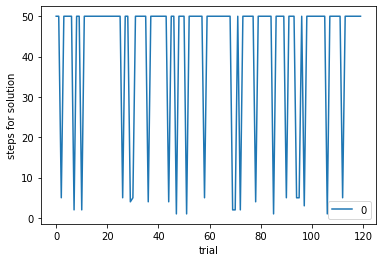

In [13]:
import pandas as pd

df = pd.DataFrame([metric["knowledge"] for metric in explore_metrics] +
                  [metric["knowledge"] for metric in exploit_metrics])
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("knowledge %")

df = pd.DataFrame([metric["population"] for metric in explore_metrics] +
                  [metric["population"] for metric in exploit_metrics])
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")

df = pd.DataFrame([metric["steps_in_trial"] for metric in explore_metrics] +
                  [metric["steps_in_trial"] for metric in exploit_metrics])
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("steps for solution")
